<a href="https://colab.research.google.com/github/AC8151/COG_INTERNSHIP_GN22CDBDS001/blob/main/Time%20Series%20Analysis%20PART%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/a-forty-two/diamler_17_jan/blob/main/Sample-Superstore.xls?raw=true

--2022-04-04 12:37:23--  https://github.com/a-forty-two/diamler_17_jan/blob/main/Sample-Superstore.xls?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/a-forty-two/diamler_17_jan/raw/main/Sample-Superstore.xls [following]
--2022-04-04 12:37:23--  https://github.com/a-forty-two/diamler_17_jan/raw/main/Sample-Superstore.xls
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/a-forty-two/diamler_17_jan/main/Sample-Superstore.xls [following]
--2022-04-04 12:37:23--  https://raw.githubusercontent.com/a-forty-two/diamler_17_jan/main/Sample-Superstore.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199

In [2]:
!cp Sample-Superstore.xls?raw=true superstore.xls

In [3]:
!ls

 sample_data  'Sample-Superstore.xls?raw=true'	 superstore.xls


In [4]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

     |████████████████████████████████| 9.9 MB 5.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
     |████████████████████████████████| 96 kB 2.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_excel('superstore.xls')
pd.set_option('display.max_rows', 500)

In [7]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
data.info()
# 9994  total
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
# unique values exist per column! (CARDINALITY)
for name in data.columns:
  print(name , end=" ")
  print(data[name].value_counts())
# too bulky to analyze, we just need to know per column 
# a COUNT of unique values!

Row ID 2049    1
8865    1
6806    1
4759    1
8857    1
       ..
5432    1
7481    1
1338    1
3387    1
2047    1
Name: Row ID, Length: 9994, dtype: int64
Order ID CA-2017-100111    14
CA-2017-157987    12
US-2016-108504    11
CA-2016-165330    11
US-2015-126977    10
                  ..
CA-2015-162544     1
CA-2017-126788     1
US-2016-152373     1
CA-2016-155446     1
US-2017-117723     1
Name: Order ID, Length: 5009, dtype: int64
Order Date 2016-09-05    38
2017-09-02    36
2016-11-10    35
2017-12-02    34
2017-12-01    34
              ..
2016-02-25     1
2014-01-15     1
2014-09-24     1
2017-07-12     1
2015-12-09     1
Name: Order Date, Length: 1237, dtype: int64
Ship Date 2015-12-16    35
2017-09-26    34
2017-11-21    32
2017-12-06    32
2017-09-06    30
              ..
2014-12-24     1
2017-04-06     1
2016-08-07     1
2016-08-25     1
2017-07-22     1
Name: Ship Date, Length: 1334, dtype: int64
Ship Mode Standard Class    5968
Second Class      1945
First Class       1

In [10]:
# CARDINALITY
for name in data.columns:
  print(name , end=" ")
  # Aggregate to view smaller but more readable data!
  print(data[name].value_counts().count())

Row ID 9994
Order ID 5009
Order Date 1237
Ship Date 1334
Ship Mode 4
Customer ID 793
Customer Name 793
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Product ID 1862
Category 3
Sub-Category 17
Product Name 1850
Sales 6144
Quantity 14
Discount 12
Profit 7545


OBSERVATION: 
> columns Sales, Quantity, Discount, Profit can be chosen for continuous data
> but Quantity, Discount appear to be DISCRETE (less values)
> now Profit is more varied than Sales, as it depends on Discount

**Therefore, we consider Sales as the continuous data, on which we will create a time-series analysis**

In [11]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [12]:
data['Order Date']
# multiple date entries in the record!

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [ ]:
data['Order Date'].min(), data['Order Date'].max()
# OBSERVATION-> Jan1,2 of 2014 is missing!
# 31st dec of 2017-> missing NOT null!

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [13]:
df = data.groupby('Order Date')
df['Order Date'].value_counts().count()
# ONLY 1237 entries for all the days of 2014 to 2017!

1237

OBSERVATION:
* 4 years X 365.25 days = 1461 (expected)
* reality-> 1237 entries!
> Missing values= 1461 - 1237 = 224 

**Therefore, 224 values need to be filled/created *(RESAMPLE)***

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [20]:
# creating time-series dataset
monthly_df=data[['Order Date', 'Sales']].copy()
monthly_df.set_index('Order Date', inplace=True)
monthly_df.head()

,Sales
Order Date,
2016-11-08,261.9600
2016-11-08,731.9400
2016-06-12,14.6200
2015-10-11,957.5775
2015-10-11,22.3680


OBSERVATION:
* Resampling is done by **MONTH (MS)** because
> Resampling by 1D leads to 4x365.25 dates => repeated values <br>
> Each month has different no. of days => resampled by avg. dates

In [21]:
monthly_df = monthly_df.resample('MS').sum().interpolate()
monthly_df

,Sales
Order Date,
2014-01-01,14236.8950
2014-02-01,4519.8920
2014-03-01,55691.0090
2014-04-01,28295.3450
2014-05-01,23648.2870
2014-06-01,34595.1276
2014-07-01,33946.3930
2014-08-01,27909.4685
2014-09-01,81777.3508


Text(0, 0.5, 'Sales')

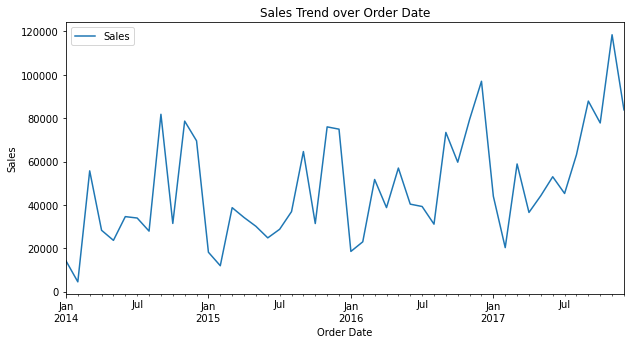

In [22]:
monthly_df.plot(figsize=(10,5), title='Sales Trend over Order Date')
plt.xlabel('Order Date')
plt.ylabel('Sales')

OBSERVATION:
1. Sales trend is **POSITIVE**
2. Sales **INCREASES FROM JULY-DEC (FESTIVE)**
3. Sales **LESS FROM JAN-JUNE (MONEY SPENT)**

In [18]:
# vectors->
# PERIOD or SEASON 
# dy/dx-> SLOPE of the data or DIRECTION of the graph
# NOISE or RESIDUE

# data -> dy/dx or slope is always constant 
#.     -> PERIOD-> sin + cos function that can be consistently
#             placed on data
#       -> whatever is left is called NOISE

# ORIGINAL_GRAPH = SLOPE + Season + Noise
# we predict the slope in time (always fixed)
# we predict season in time (manipulate)
# we predict noise in time (randomness)
# we add the results to get the original prediction!

OBSERVATION:
> There is a need to visualize these observations above properly. <br>
**Thus, we DECOMPOSE the graph into 3 to view TREND, SEASONAL TREND (PATTERN), NOISE (EXTRA)**

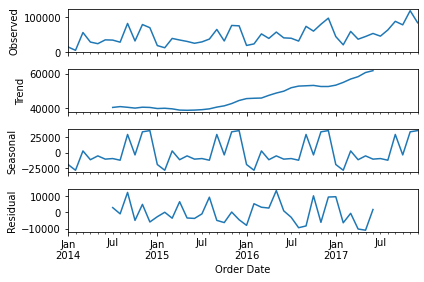

In [28]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(monthly_df, model='additive') # additive means graphs trend + seasonal + residual = observed
decomposition.plot()
plt.show()

# Trend (T)    => POSITIVE
# Seasonal (S) => Sales increases after July, Dips in January-Feb, Then gradually increases
# Residual (R) => Noise